In [1]:
# Importing Libs
import os
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
pd.set_option('display.max_columns', 50)
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder # Perform OneHotEnconding
from sklearn.model_selection import StratifiedKFold, cross_val_score,cross_val_predict # Cross Validation
from sklearn.linear_model import LogisticRegression # Modelling
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score # Evaluating the Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Collecting data
df_2019 = pd.read_csv("C:/Users/natt/OneDrive - Hanoi University of Science and Technology/Data Science/Code/Bài report/Jan_2019_ontime.csv")
df_2020 = pd.read_csv("C:/Users/natt/OneDrive - Hanoi University of Science and Technology/Data Science/Code/Bài report/Jan_2020_ontime.csv")
df_2019

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,12173,1217305,HNL,749.0,0.0,0700-0759,1832.0,0.0,0,0,3801
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,14955,1495503,SPN,717.0,0.0,0700-0759,759.0,0.0,0,0,129
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,12016,1201602,GUM,857.0,0.0,0900-0959,933.0,0.0,0,0,129
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,12016,1201602,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0,0,129


In [3]:
df_2019['DEP_DEL15'].value_counts()

0.0    468703
1.0     98927
Name: DEP_DEL15, dtype: int64

In [8]:
#Creating year indicator.
df_2019['year'] = 2019
df_2020['year'] = 2020

#Checking if the bases have the same columns
print(set(df_2020.columns) == set(df_2019.columns))

#Generating the unique base
dataset = pd.concat([df_2019,df_2020])
print(dataset.shape)
print('\n')
dataset.head()

False
(1191331, 23)




,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019,NaN


In [5]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579,2019


In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [9]:
data = dataset.drop(['OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID'], axis=1)
data.head() 

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,Unnamed: 21
0,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019,NaN
1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019,NaN
2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019,NaN
3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019,NaN
4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019,NaN


In [5]:
df_2019.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000


In [9]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [10]:
data['DISTANCE_cat'] = pd.qcut(data['DISTANCE'], q=4)

## Creating variable: ARR_TIME_BLOCK

In [11]:
# Helper function to create ARR_TIME_BLOCK
def arr_time(x):

  if x >= 600 and x <= 659:
    return '0600-0659'
  elif x>=1400 and x<=1459:
    return '1400-1459'
  elif x>=1200 and x<=1259:
    return '1200-1259'
  elif x>=1500 and x<=1559:
    return '1500-1559'
  elif x>=1900 and x<=1959:
    return '1900-1959'
  elif x>=900 and x<=959:
    return '0900-0959'
  elif x>=1000 and x<=1059:
    return  '1000-1059'
  elif x>=2000 and x<=2059:
    return '2000-2059'
  elif x>=1300 and x<=1359:
    return '1300-1359'
  elif x>=1100 and x<=1159:
    return '1100-1159'
  elif x>=800 and x<=859:
    return '0800-0859'
  elif x>=2200 and x<=2259:
    return '2200-2259'
  elif x>=1600 and x<=1659:
    return '1600-1659'
  elif x>=1700 and x<=1759:
    return '1700-1759'
  elif x>=2100 and x<=2159:
    return '2100-2159'
  elif x>=700 and x<=759:
    return '0700-0759'
  elif x>=1800 and x<=1859:
    return '1800-1859'
  elif x>=1 and x<=559:
    return '0001-0559'
  elif x>=2300 and x<=2400:
    return '2300-2400'

In [12]:
# We can create ARR_TIME_BLOCK.
#data['ARR_TIME'] = data['ARR_TIME'].astype('int')
data['ARR_TIME_BLOCK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data.head(8) 

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,Unnamed: 21,DISTANCE_cat,ARR_TIME_BLOCK
0,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019,NaN,"(30.999, 366.0]",0700-0759
1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019,NaN,"(366.0, 640.0]",1600-1659
2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019,NaN,"(30.999, 366.0]",1300-1359
3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019,NaN,"(30.999, 366.0]",1600-1659
4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019,NaN,"(366.0, 640.0]",1900-1959
5,1,2,DAY,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,2019,NaN,"(366.0, 640.0]",0900-0959
6,1,2,JAN,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,2019,NaN,"(30.999, 366.0]",1800-1859
7,1,2,LGA,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,2019,NaN,"(366.0, 640.0]",1800-1859


In [39]:
#Copy data để bỏ cột DEP_TIME & ARR_TIME
df = data.copy()
df.drop(['DEP_TIME','ARR_TIME','DISTANCE', 'Unnamed: 21'], inplace=True, axis=1)
df.set_index('year',inplace=True) 
df.head()


,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE_cat,ARR_TIME_BLOCK
year,,,,,,,,,,,
2019,1,2,GNV,ATL,0.0,0600-0659,0.0,0.0,0.0,"(30.999, 366.0]",0700-0759
2019,1,2,MSP,CVG,0.0,1400-1459,0.0,0.0,0.0,"(366.0, 640.0]",1600-1659
2019,1,2,DTW,CVG,0.0,1200-1259,0.0,0.0,0.0,"(30.999, 366.0]",1300-1359
2019,1,2,TLH,ATL,0.0,1500-1559,0.0,0.0,0.0,"(30.999, 366.0]",1600-1659
2019,1,2,ATL,FSM,0.0,1900-1959,0.0,0.0,0.0,"(366.0, 640.0]",1900-1959


In [40]:
#Missing values
df.dropna(inplace=True)

#Transformation of data types
#Transformation of data types
colunas = ['DEP_DEL15','ARR_DEL15','CANCELLED', 'ARR_TIME_BLOCK', 'DEP_TIME_BLK']
for col in colunas:
  df[col] = df[col].astype('category')  

#Discretization
#df['DISTANCE_cat'] = pd.qcut(df['DISTANCE'], q=4)

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE_cat,ARR_TIME_BLOCK
year,,,,,,,,,,,
2019,1,2,GNV,ATL,0.0,0600-0659,0.0,0.0,0.0,"(30.999, 366.0]",0700-0759
2019,1,2,MSP,CVG,0.0,1400-1459,0.0,0.0,0.0,"(366.0, 640.0]",1600-1659
2019,1,2,DTW,CVG,0.0,1200-1259,0.0,0.0,0.0,"(30.999, 366.0]",1300-1359
2019,1,2,TLH,ATL,0.0,1500-1559,0.0,0.0,0.0,"(30.999, 366.0]",1600-1659
2019,1,2,ATL,FSM,0.0,1900-1959,0.0,0.0,0.0,"(366.0, 640.0]",1900-1959


## ANOVA

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)


# Select the columns for one-hot encoding
columns_to_encode = ['DEP_DEL15', 'DEP_TIME', 'ARR_TIME', 'CANCELLED']

# Perform one-hot encoding
encoded_features = encoder.fit_transform(data[columns_to_encode].astype(str))

# Create a DataFrame with the encoded features
encoded_df = pd.data(encoded_features, columns=encoder.get_feature_names(columns_to_encode))

# Add the target variable
encoded_df['ARR_DEL15'] = data['ARR_DEL15']

# Display the head of the encoded dataframe
print(encoded_df.head())

KeyboardInterrupt: 

In [41]:
# Split the data into categorical and numerical datasets
categorical_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(exclude=['object'])

In [42]:
categorical_df.head()

,ORIGIN,DEST
year,,
2019,GNV,ATL
2019,MSP,CVG
2019,DTW,CVG
2019,TLH,ATL
2019,ATL,FSM


In [43]:
numerical_df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE_cat,ARR_TIME_BLOCK
year,,,,,,,,,
2019,1,2,0.0,0600-0659,0.0,0.0,0.0,"(30.999, 366.0]",0700-0759
2019,1,2,0.0,1400-1459,0.0,0.0,0.0,"(366.0, 640.0]",1600-1659
2019,1,2,0.0,1200-1259,0.0,0.0,0.0,"(30.999, 366.0]",1300-1359
2019,1,2,0.0,1500-1559,0.0,0.0,0.0,"(30.999, 366.0]",1600-1659
2019,1,2,0.0,1900-1959,0.0,0.0,0.0,"(366.0, 640.0]",1900-1959


In [26]:
from sklearn.feature_selection import f_classif

# Selecting numeric features for ANOVA F-test
numeric_features = numerical_df.select_dtypes(include=[np.number]).columns.tolist()

# Perform the ANOVA F-test
f_values, p_values = f_classif(numerical_df[numeric_features].fillna(0), numerical_df['ARR_DEL15'].fillna(0))

# Create a DataFrame to hold feature names and their respective F-values and p-values
anova_results = pd.DataFrame({'Feature': numeric_features, 'F-value': f_values, 'p-value': p_values})

# Sort the features by the highest F-value
anova_results_sorted = anova_results.sort_values('F-value', ascending=False)

# Display the sorted ANOVA results
print(anova_results_sorted.head())

ValueError: at least one array or dtype is required

In [20]:
from sklearn.feature_selection import f_classif

# Selecting numeric features for ANOVA F-test
numeric_features = categorical_df.select_dtypes(include=[np.number]).columns.tolist()

# Perform the ANOVA F-test
f_values, p_values = f_classif(categorical_df[numeric_features].fillna(0), numerical_df['ARR_DEL15'].fillna(0))

# Create a DataFrame to hold feature names and their respective F-values and p-values
anova_results = pd.DataFrame({'Feature': numeric_features, 'F-value': f_values, 'p-value': p_values})

# Sort the features by the highest F-value
anova_results_sorted = anova_results.sort_values('F-value', ascending=False)

# Display the sorted ANOVA results
print(anova_results_sorted.head())

ValueError: at least one array or dtype is required

In [28]:
import pandas as pd
from scipy.stats import f_oneway
from tqdm import tqdm

tqdm.pandas()

# Perform ANOVA correlation coefficient feature selection for categorical data
anova_results = {}
for column in tqdm(numerical_df.columns):
    unique_values = numerical_df[column].unique()
    if len(unique_values) > 1:  # Ensure there are at least two unique values
        groups = [df[df[column] == value]['ARR_DEL15'].values for value in unique_values]
        anova_results[column] = f_oneway(*groups)[1]  # p-value

# Filter out the strongly associated categorical features (p-value < 0.05)
strong_association = {k: v for k, v in anova_results.items() if v < 0.05}

# Keep only strongly associated categorical features
strongly_associated_categorical_data = numerical_df[list(strong_association.keys())]

# Output the strongly associated categorical features
print('Strongly associated categorical features with ARR_DEL15:')
print(list(strong_association.keys()))

100%|██████████| 9/9 [00:01<00:00,  7.35it/s]

Strongly associated categorical features with ARR_DEL15:
['DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_DEL15', 'DISTANCE_cat', 'ARR_TIME_BLOCK']


In [32]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)


# Select the columns for one-hot encoding
columns_to_encode = ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_DEL15', 'DISTANCE_cat', 'ARR_TIME_BLOCK']

# Perform one-hot encoding
encoded_features = encoder.fit_transform(df[columns_to_encode].astype(str))

# Create a DataFrame with the encoded features
encoded_df = pd.df(encoded_features, columns=encoder.get_feature_names(columns_to_encode))

# Add the target variable
encoded_df['ARR_DEL15'] = df['ARR_DEL15']

# Display the head of the encoded dataframe
print(encoded_df.head())

AttributeError: module 'pandas' has no attribute 'df'

## ONE HOT ENCODING

In [48]:

target_final = df[['ARR_DEL15']] 

cat_vars_final = df.select_dtypes(['object','category'])
cat_vars_final = cat_vars_final.loc[:, ['DEP_DEL15','DEP_TIME_BLK','DISTANCE_cat','ARR_TIME_BLOCK', 'CANCELLED']] 

#One Hot Encoder

enc = OneHotEncoder().fit(cat_vars_final)

cat_vars_ohe_final = enc.transform(cat_vars_final).toarray()
cat_vars_ohe_final = pd.DataFrame(cat_vars_ohe_final, index= cat_vars_final.index, 
                      columns=enc.get_feature_names_out(cat_vars_final.columns.tolist()))

# Print the resulting DataFrames

print("Target variable:")
print(target_final.head())
print("\nCategorical variables (after One Hot Encoding):")
print(cat_vars_ohe_final.head())
print("\nNumeric variables:")
print(cat_vars_ohe_final)

Target variable:
     ARR_DEL15
year          
2019       0.0
2019       0.0
2019       0.0
2019       0.0
2019       0.0

Categorical variables (after One Hot Encoding):
      DEP_DEL15_0.0  DEP_DEL15_1.0  DEP_TIME_BLK_0001-0559  \
year                                                         
2019            1.0            0.0                     0.0   
2019            1.0            0.0                     0.0   
2019            1.0            0.0                     0.0   
2019            1.0            0.0                     0.0   
2019            1.0            0.0                     0.0   

      DEP_TIME_BLK_0600-0659  DEP_TIME_BLK_0700-0759  DEP_TIME_BLK_0800-0859  \
year                                                                           
2019                     1.0                     0.0                     0.0   
2019                     0.0                     0.0                     0.0   
2019                     0.0                     0.0                     0

In [ ]:
# prompt: Using pearson correlation features selection for numerical data set

# Calculate the Pearson correlation matrix
corr_matrix = numerical_df.corr()

# Identify the features with high correlation (above 0.75)
correlated_features = corr_matrix[corr_matrix['ARR_DEL15'] > 0.75].index

# Drop the correlated features from the numerical dataset
numerical_data = numerical_df.drop(correlated_features, axis=1)

#Add the SalePrice column again
numerical_data = pd.concat([numerical_df, df['ARR_DEL15']], axis=1)

In [53]:
numerical_data.head()

,index,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
0,0,1,2,601.0,0.0,722,0.0,0.0,0.0,300.0,2019
1,1,1,2,1359.0,0.0,1633,0.0,0.0,0.0,596.0,2019
2,2,1,2,1215.0,0.0,1329,0.0,0.0,0.0,229.0,2019
3,3,1,2,1521.0,0.0,1625,0.0,0.0,0.0,223.0,2019
4,4,1,2,1847.0,0.0,1940,0.0,0.0,0.0,579.0,2019


## Numerical ANOVA

In [54]:
import pandas as pd
from scipy.stats import f_oneway
from tqdm import tqdm

tqdm.pandas()


# Split the data into categorical and numerical datasets
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(exclude=['object'])

# Perform ANOVA correlation coefficient feature selection for categorical data
anova_results = {}
for column in tqdm(numerical_data.columns):
    unique_values = numerical_data[column].unique()
    if len(unique_values) > 1:  # Ensure there are at least two unique values
        groups = [df[df[column] == value]['ARR_DEL15'].values for value in unique_values]
        anova_results[column] = f_oneway(*groups)[1]  # p-value

# Filter out the strongly associated categorical features (p-value < 0.05)
strong_association = {k: v for k, v in anova_results.items() if v < 0.05}

# Keep only strongly associated categorical features
strongly_associated_categorical_data = numerical_data[list(strong_association.keys())]

# Output the strongly associated categorical features
print('Strongly associated numerical features with ARR_DEL15:')
print(list(strong_association.keys()))

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00,  9.58it/s]

Strongly associated numerical features with ARR_DEL15:
['DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'ARR_DEL15', 'DISTANCE_cat']


## Categorical data

In [31]:
import pandas as pd
from scipy.stats import f_oneway
from tqdm import tqdm

tqdm.pandas()


# Split the data into categorical and numerical datasets
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(exclude=['object'])

# Perform ANOVA correlation coefficient feature selection for categorical data
anova_results = {}
for column in tqdm(categorical_df.columns):
    unique_values = categorical_df[column].unique()
    if len(unique_values) > 1:  # Ensure there are at least two unique values
        groups = [df[df[column] == value]['ARR_DEL15'].values for value in unique_values]
        anova_results[column] = f_oneway(*groups)[1]  # p-value

# Filter out the strongly associated categorical features (p-value < 0.05)
strong_association = {k: v for k, v in anova_results.items() if v < 0.05}

# Keep only strongly associated categorical features
strongly_associated_categorical_data = categorical_df[list(strong_association.keys())]

# Output the strongly associated categorical features
print('Strongly associated categorical features with ARR_DEL15:')
print(list(strong_association.keys()))

100%|██████████| 4/4 [01:29<00:00, 22.29s/it]

Strongly associated categorical features with ARR_DEL15:
[]


In [3]:
df=df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST','DEP_DEL15','DEP_TIME_BLK', 'ARR_DEL15', 'ARR_TIME_BLOCK', 'DISTANCE_cat']]
df.head()

NameError: name 'df' is not defined

## ONEHOT ENCODING

In [ ]:
# Separate target, numeric and categorical variables 'ORIGIN', 'DEST'


# Separate target variable

target_final = df[['ARR_DEL15']]

# Select categorical variables

cat_vars_final = ['ORIGIN', 'DEST', 'DEP_TIME_BLK', 'ARR_TIME_BLOCK']

# Select numeric variables (excluding the target variable)

numeric_vars_final = df.drop(columns=['ARR_DEL15'])

#One Hot Encoder

enc = OneHotEncoder()

cat_vars_ohe_final = pd.DataFrame(enc.fit_transform(df[cat_vars_final]), index=df.index,
                                  columns=enc.get_feature_names_out(cat_vars_final))



# Print the resulting DataFrames

print("Target variable:")
print(target_final.head())
print("\nCategorical variables (after One Hot Encoding):")
print(cat_vars_ohe_final.head())
print("\nNumeric variables:")
print(numeric_vars_final.head())

In [2]:
base_final = df.copy()

NameError: name 'df' is not defined

In [1]:
# Separate target, numeric and categorical variables 'ORIGIN', 'DEST'

target_final = df[['ARR_DEL15']]

cat_vars_final = df.select_dtypes(['object','category'])
cat_vars_final = cat_vars_final.loc[:, ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST','DEP_DEL15','DEP_TIME_BLK', 
                                        'ARR_DEL15', 'ARR_TIME_BLOCK', 'DISTANCE_cat']]

#One Hot Encoder

enc = OneHotEncoder().fit(cat_vars_final)

cat_vars_ohe_final = enc.transform(cat_vars_final).toarray()
cat_vars_ohe_final = pd.DataFrame(cat_vars_ohe_final, index= cat_vars_final.index, 
                      columns=enc.get_feature_names(cat_vars_final.columns.tolist()))

NameError: name 'df' is not defined

In [ ]:
# Generate a copy of data
encoded_data = df.copy()

# One Hot encoding
oh_enc = OneHotEncoder()

# Use the fit_transform method on each column separately
gender_onehot = pd.DataFrame(oh_enc.fit_transform(encoded_data[['DEP_DEL15']]).toarray(), columns=oh_enc.get_feature_names_out(['gender']))
marital_status_onehot = pd.DataFrame(oh_enc.fit_transform(encoded_data[['ARR_TIME_BLOCK']]).toarray(), columns=oh_enc.get_feature_names_out(['marital_status_code']))
employment_onehot = pd.DataFrame(oh_enc.fit_transform(encoded_data[['DEP_TIME_BLK']]).toarray(), columns = oh_enc.get_feature_names_out(['employment_type']))

# Replace the original columns with the one-hot encoded columns
encoded_data = pd.concat([encoded_data, gender_onehot, marital_status_onehot, employment_onehot], axis=1)

In [ ]:
from sklearn.feature_selection import f_classif

# Selecting numeric features for ANOVA F-test
numeric_features = data.select_dtypes(exclude=[np.number]).columns.tolist()

# Perform the ANOVA F-test
f_values, p_values = f_classif(data[numeric_features].fillna(0), data['ARR_DEL15'].fillna(0))

# Create a DataFrame to hold feature names and their respective F-values and p-values
anova_results = pd.DataFrame({'Feature': numeric_features, 'F-value': f_values, 'p-value': p_values})

# Sort the features by the highest F-value
anova_results_sorted = anova_results.sort_values('F-value', ascending=False)

# Display the sorted ANOVA results
print(anova_results_sorted.head())

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from tqdm import tqdm

tqdm.pandas()


# Split the data into categorical and numerical datasets
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(exclude=['object'])

# Perform ANOVA correlation coefficient feature selection for categorical data
anova_results = {}
for column in tqdm(categorical_data.columns):
    unique_values = categorical_data[column].unique()
    if len(unique_values) > 1:  # Ensure there are at least two unique values
        groups = [data[data[column] == value]['ARR_DEL15'].values for value in unique_values]
        anova_results[column] = f_oneway(*groups)[1]  # p-value

# Filter out the strongly associated categorical features (p-value < 0.05)
strong_association = {k: v for k, v in anova_results.items() if v < 0.05}

# Keep only strongly associated categorical features
strongly_associated_categorical_data = categorical_data[list(strong_association.keys())]

# Output the strongly associated categorical features
print('Strongly associated numerical features with ARR_DEL15:')
print(list(strong_association.keys()))

In [13]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 3   OP_CARRIER_FL_NUM      583985 non-null  int64  
 4   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 5   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 6   DEST_AIRPORT_ID        583985 non-null  int64  
 7   DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 8   DEP_TIME               567633 non-null  float64
 9   DEP_DEL15              567630 non-null  float64
 10  ARR_TIME               566924 non-null  float64
 11  ARR_DEL15              565963 non-null  float64
 12  CANCELLED              583985 non-null  int64  
 13  DIVERTED               583985 non-null  int64  
 14  DISTANCE               583985 non-nu

## Data Preprocessing


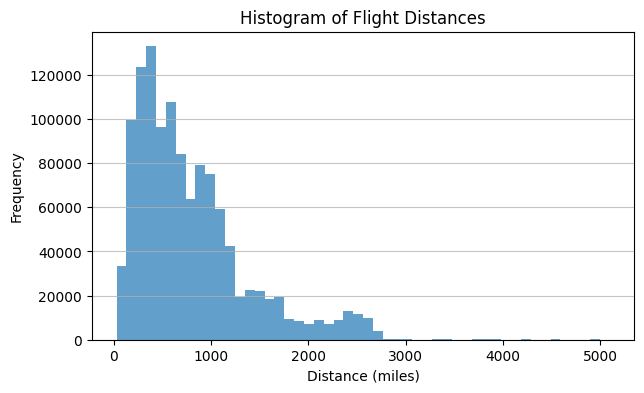

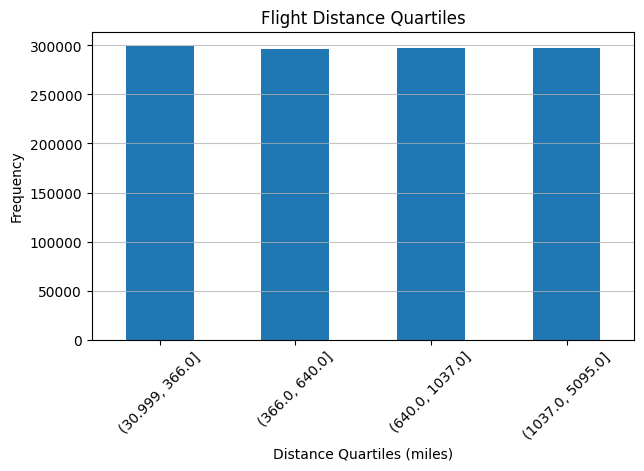

In [40]:
# Discretize the 'DISTANCE' column into bins and plot the histogram
plt.figure(figsize=(7, 4))
data['DISTANCE'].plot(kind='hist', bins=50, alpha=0.7)
plt.title('Histogram of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Discretize the 'DISTANCE' column into quartiles and plot the histogram
quartiles = pd.qcut(data['DISTANCE'], q=4)
quartile_counts = quartiles.value_counts().sort_index()

# Plotting the quartile counts
plt.figure(figsize=(7, 4))
quartile_counts.plot(kind='bar')
plt.title('Flight Distance Quartiles')
plt.xlabel('Distance Quartiles (miles)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [8]:
#Missing values
data.dropna(inplace=True)

#Transformation of data types
colunas = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED']
for col in colunas:
  df_2019[col] = df_2019[col].astype('category') 

In [10]:
# Helper function to create ARR_TIME_BLOCK
def arr_time(x):

  if x >= 600 and x <= 659:
    return '0600-0659'
  elif x>=1400 and x<=1459:
    return '1400-1459'
  elif x>=1200 and x<=1259:
    return '1200-1259'
  elif x>=1500 and x<=1559:
    return '1500-1559'
  elif x>=1900 and x<=1959:
    return '1900-1959'
  elif x>=900 and x<=959:
    return '0900-0959'
  elif x>=1000 and x<=1059:
    return  '1000-1059'
  elif x>=2000 and x<=2059:
    return '2000-2059'
  elif x>=1300 and x<=1359:
    return '1300-1359'
  elif x>=1100 and x<=1159:
    return '1100-1159'
  elif x>=800 and x<=859:
    return '0800-0859'
  elif x>=2200 and x<=2259:
    return '2200-2259'
  elif x>=1600 and x<=1659:
    return '1600-1659'
  elif x>=1700 and x<=1759:
    return '1700-1759'
  elif x>=2100 and x<=2159:
    return '2100-2159'
  elif x>=700 and x<=759:
    return '0700-0759'
  elif x>=1800 and x<=1859:
    return '1800-1859'
  elif x>=1 and x<=559:
    return '0001-0559'
  elif x>=2300 and x<=2400:
    return '2300-2400'

In [11]:
# We can create ARR_TIME_BLOCK.
data['ARR_TIME'] = data['ARR_TIME'].astype('int')
data['ARR_TIME_BLOCK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data.reset_index(inplace=True)
data.head(8)

,index,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,ARR_TIME_BLOCK
0,0,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,0700-0759
1,1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,1600-1659
2,2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,1300-1359
3,3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,1600-1659
4,4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,1900-1959
5,5,1,2,DAY,MSP,853.0,0.0,0900-0959,953,0.0,0.0,0.0,574.0,2019,0900-0959
6,6,1,2,JAN,ATL,1553.0,0.0,1500-1559,1832,0.0,0.0,0.0,341.0,2019,1800-1859
7,7,1,2,LGA,CVG,1551.0,0.0,1500-1559,1824,0.0,0.0,0.0,585.0,2019,1800-1859


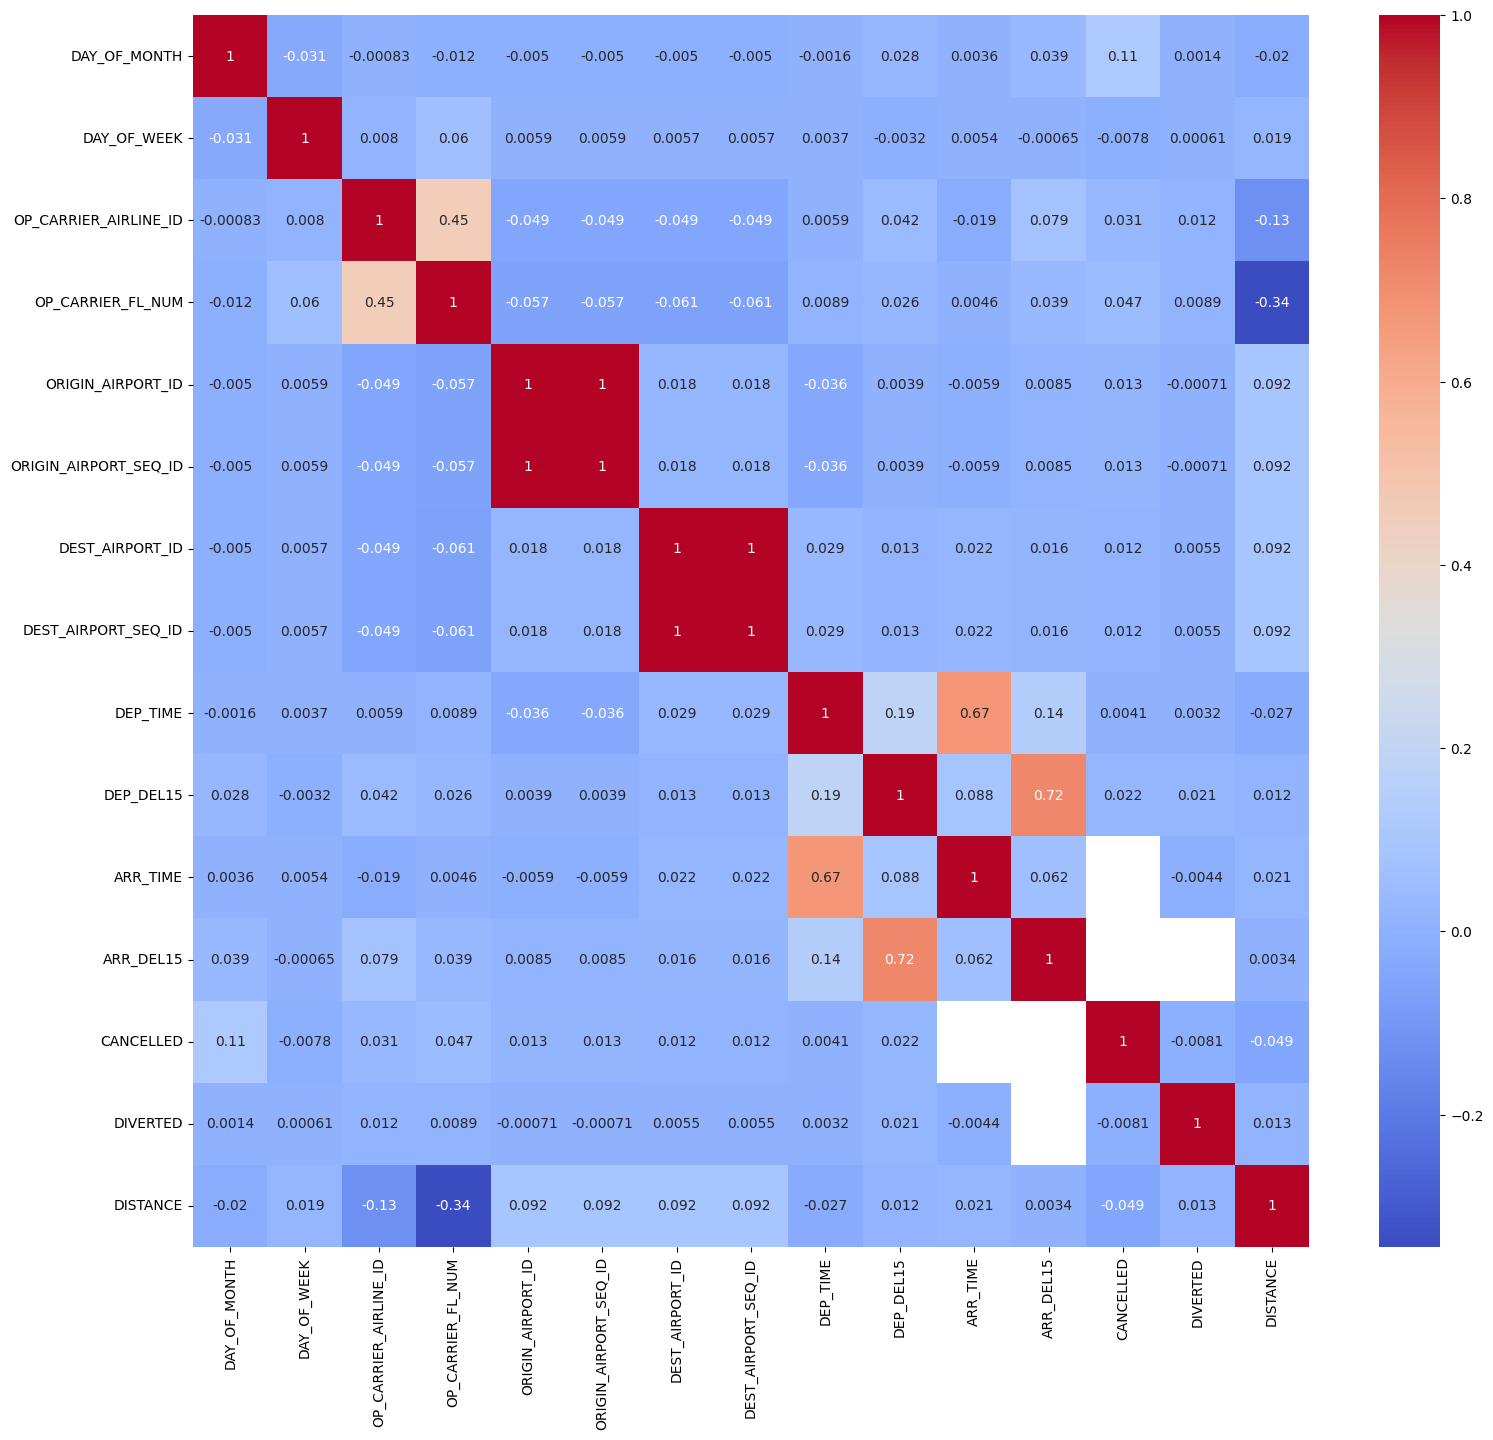

In [5]:
plt.figure(figsize = (18, 16))
sns.heatmap(df_2019.corr(), annot = True, cmap = 'coolwarm')
plt.show()

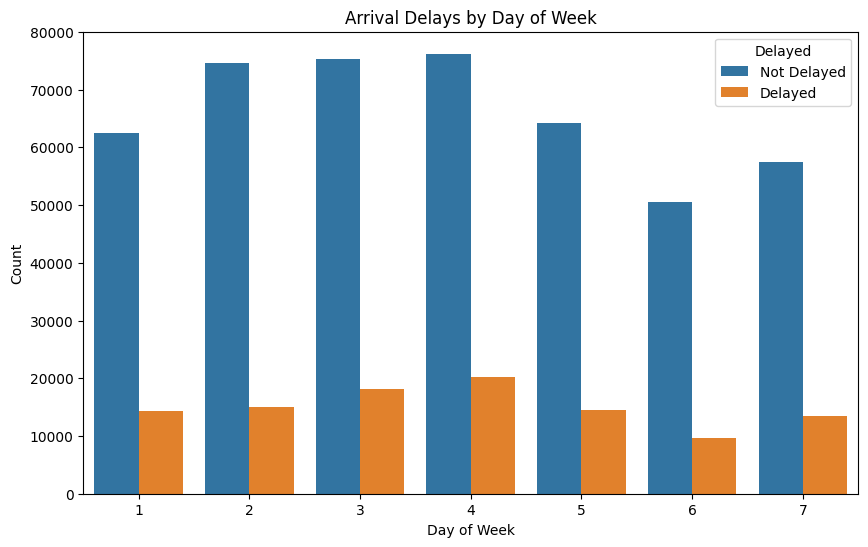

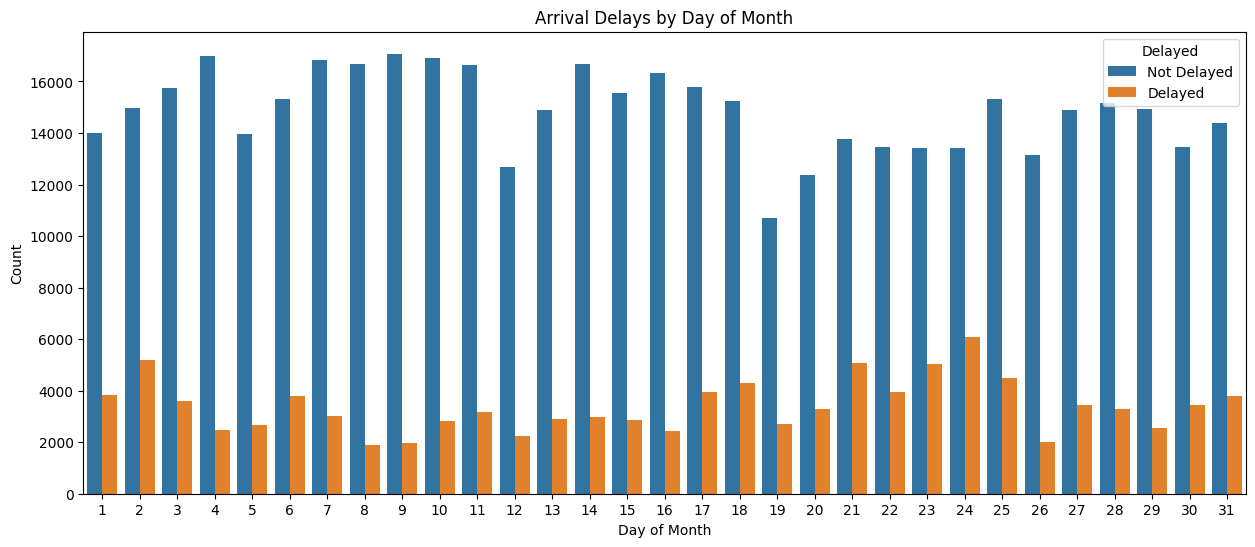

In [8]:
# Visualizing delays by day_of_week
plt.figure(figsize=(7, 4))
sns.countplot(x='DAY_OF_WEEK', hue='ARR_DEL15', data = df_2019)
plt.title('Arrival Delays by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Delayed', labels=['Not Delayed', 'Delayed'])
plt.show()

# Visualizing delays by day_of_month
plt.figure(figsize=(7, 4))
sns.countplot(x='DAY_OF_MONTH', hue='ARR_DEL15', data=df_2019)
plt.title('Arrival Delays by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.legend(title='Delayed', labels=['Not Delayed', 'Delayed'])
plt.show()

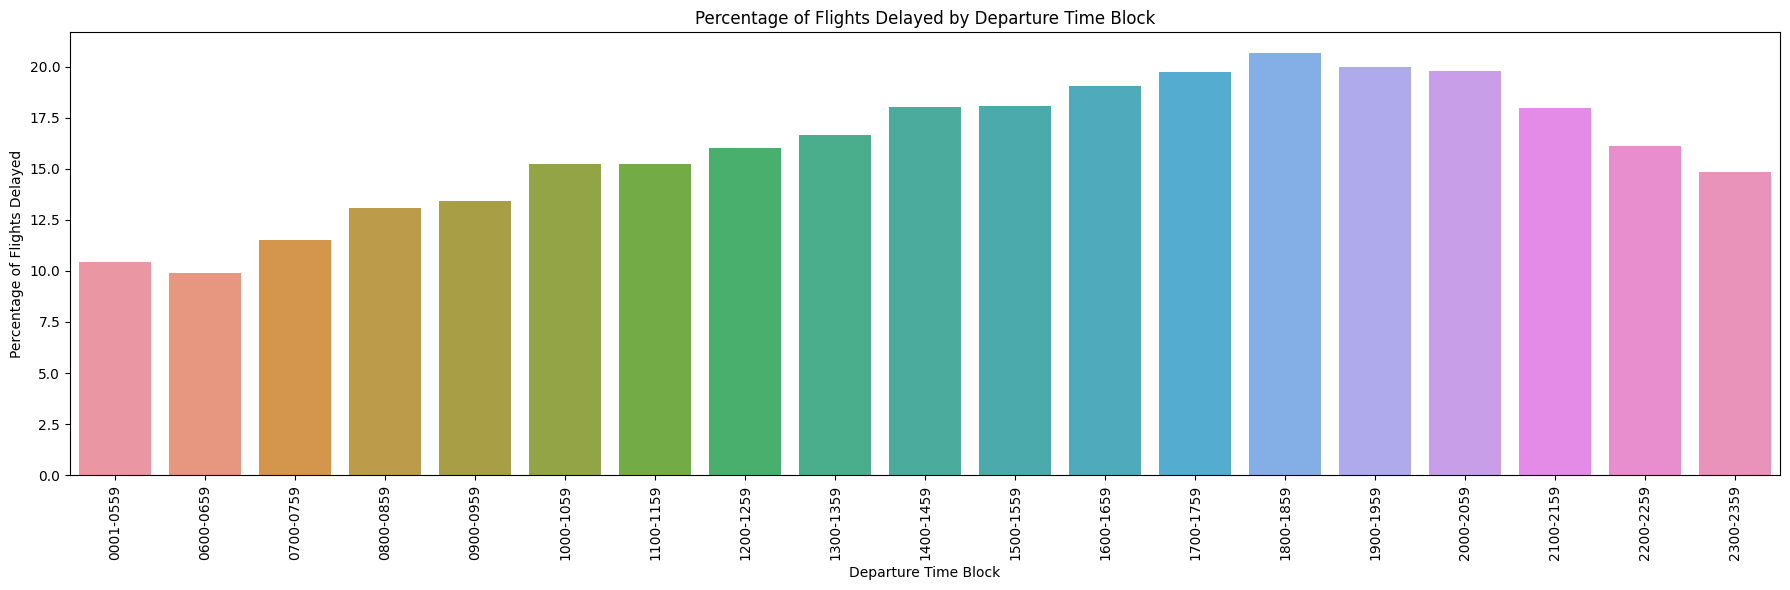

In [16]:
# Calculate the percentage of delayed flights by DEP_TIME_BLK
# We consider a flight delayed if ARR_DEL15 is 1
percentage_delays = data.groupby('DEP_TIME_BLK')['ARR_DEL15'].mean() * 100
percentage_delays = percentage_delays.reset_index()

# Plotting the distribution of delays by DEP_TIME_BLK
plt.figure(figsize=(18, 6))
sns.barplot(x='DEP_TIME_BLK', y='ARR_DEL15', data=percentage_delays.sort_values('DEP_TIME_BLK'))
plt.xticks(rotation=90)
plt.xlabel('Departure Time Block')
plt.ylabel('Percentage of Flights Delayed')
plt.title('Percentage of Flights Delayed by Departure Time Block')
plt.tight_layout()

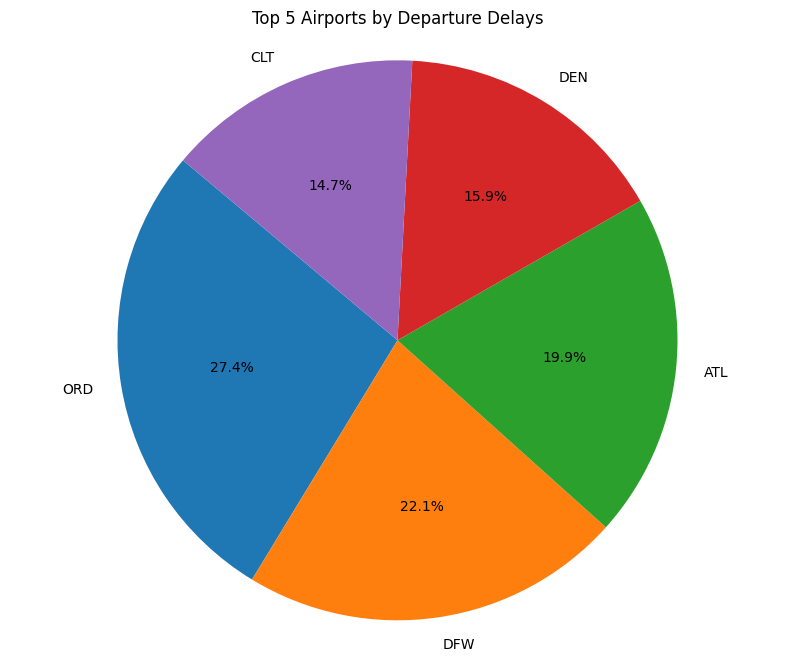

In [20]:
# Calculate the total number of delayed flights by ORIGIN
origin_delays = data.groupby('ORIGIN')['DEP_DEL15'].sum().sort_values(ascending=False)

# Select the top 5 airports with the most delays
top_5_origin_delays = origin_delays.head(5)

# Plotting the pie chart for the top 5 airports
plt.figure(figsize=(10, 8))
plt.pie(top_5_origin_delays, labels=top_5_origin_delays.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Airports by Departure Delays')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

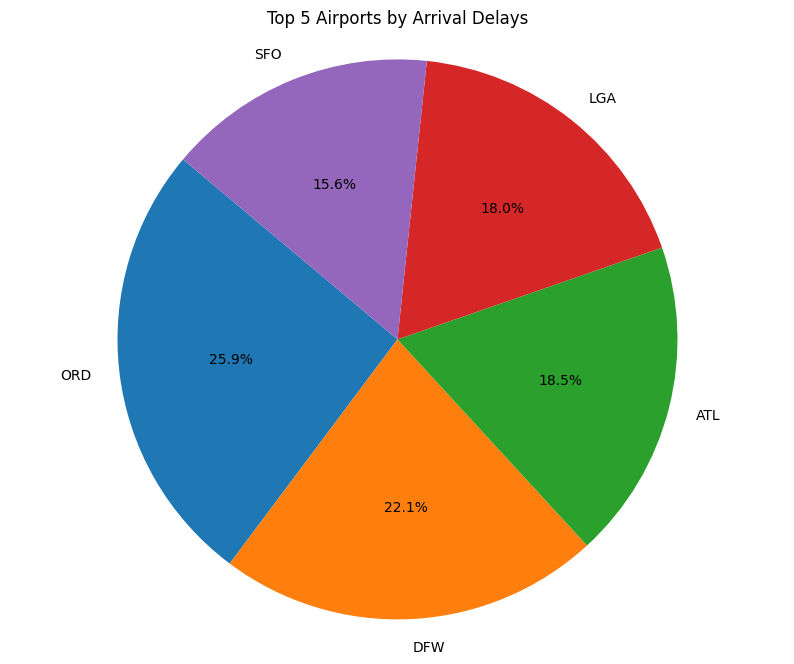

In [18]:
# Calculate the total number of delayed flights by ORIGIN
dest_delays = data.groupby('DEST')['ARR_DEL15'].sum().sort_values(ascending=False)

# Select the top 5 airports with the most delays
top_5_dest_delays = dest_delays.head(5)

# Plotting the pie chart for the top 5 airports
plt.figure(figsize=(10, 8))
plt.pie(top_5_dest_delays, labels=top_5_dest_delays.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Airports by Arrival Delays')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [16]:
plot2 = df_2019.groupby('DAY_OF_MONTH')['DIVERTED'].count()
fig2 = go.Figure()

fig2.add_trace(go.Bar(x=plot2.index, y=plot2.values, name='Diverted bar',opacity=0.6,marker_color='#ff0000'))

fig2.add_trace(go.Scatter(x=plot2.index, y=plot2.values, line=dict(color='#4200ff'), name='Diverted trend'))
fig2.update_layout(
    title="Diverted flights vs day of month",
    xaxis_title="Day of month",
    yaxis_title="Diverted count",
)
fig2.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Grouping by origin airport and calculating the average arrival delay
origin_delays = df_2019.groupby('ORIGIN')['DEP_DELAY15'].mean().reset_index()

# Loading the airport locations data
airports = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Merging the airport locations with the average delays
merged = airports.merge(origin_delays, left_on='name', right_on='ORIGIN', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='DEP_DELAY15', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average Arrival Delays by Origin Airport')
plt.show()

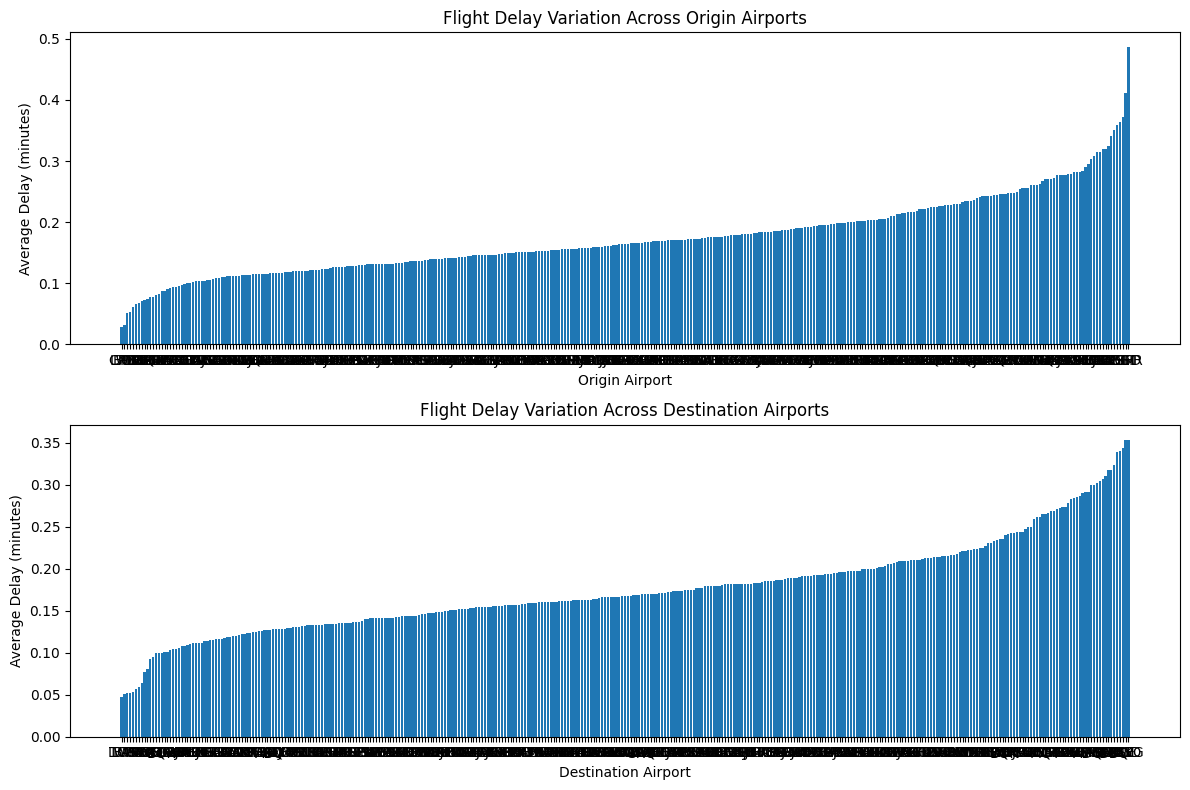

In [17]:
flights_jan = pd.concat([df_2019, df_2020], ignore_index=True)

data = flights_jan[['ORIGIN', 'DEST', 'ARR_DEL15']].dropna()
origin_delay = data.groupby('ORIGIN')['ARR_DEL15'].mean()
dest_delay = data.groupby('DEST')['ARR_DEL15'].mean()
origin_delay = origin_delay.sort_values()
dest_delay = dest_delay.sort_values()

fig, axes = plt.subplots(nrows=2, figsize=(12, 8))
axes[0].bar(origin_delay.index, origin_delay.values)
axes[0].set_xlabel('Origin Airport')
axes[0].set_ylabel('Average Delay (minutes)')
axes[0].set_title('Flight Delay Variation Across Origin Airports')

axes[1].bar(dest_delay.index, dest_delay.values)
axes[1].set_xlabel('Destination Airport')
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].set_title('Flight Delay Variation Across Destination Airports')

plt.tight_layout()
plt.show()

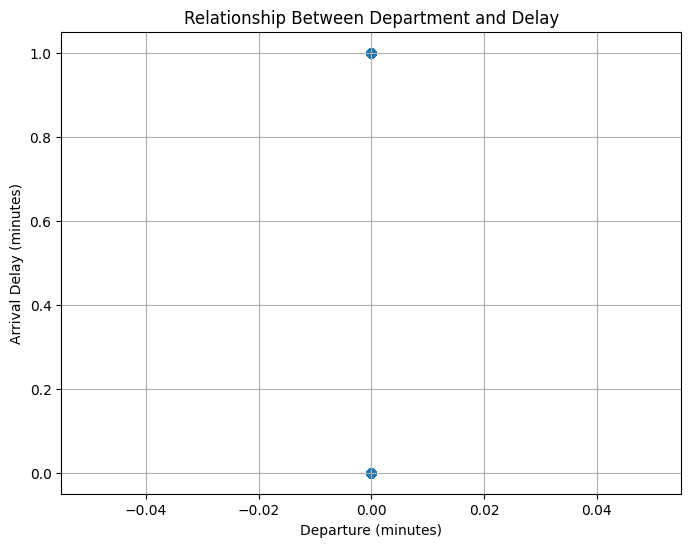

Correlation Coefficient: nan


In [8]:
# Correlation coefficient
correlation = df_2019['DIVERTED'].corr(df_2019['ARR_DEL15'])

plt.figure(figsize=(8, 6))
plt.scatter(df_2019['DIVERTED'], df_2019['ARR_DEL15'], alpha=0.5)
plt.xlabel('Departure (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Relationship Between Department and Delay')
plt.grid(True)
plt.show()
print("Correlation Coefficient:", correlation)

In [55]:
# Split the data into categorical and numerical datasets
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(exclude=['object'])
numerical_data.head(5)

,index,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
0,0,1,2,601.0,0.0,722,0.0,0.0,0.0,300.0,2019
1,1,1,2,1359.0,0.0,1633,0.0,0.0,0.0,596.0,2019
2,2,1,2,1215.0,0.0,1329,0.0,0.0,0.0,229.0,2019
3,3,1,2,1521.0,0.0,1625,0.0,0.0,0.0,223.0,2019
4,4,1,2,1847.0,0.0,1940,0.0,0.0,0.0,579.0,2019


In [80]:
from sklearn.feature_selection import f_classif

# Selecting numeric features for ANOVA F-test
numeric_features = df_2019.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('ARR_DEL15')  # Exclude the target variable

# Perform the ANOVA F-test
f_values, p_values = f_classif(df_2019[numeric_features].fillna(0), df_2019['ARR_DEL15'].fillna(0))

# Create a DataFrame to hold feature names and their respective F-values and p-values
anova_results = pd.DataFrame({'Feature': numeric_features, 'F-value': f_values, 'p-value': p_values})

# Sort the features by the highest F-value
anova_results_sorted = anova_results.sort_values('F-value', ascending=False)

# Display the sorted ANOVA results
print(anova_results_sorted.head(21))

                  Feature        F-value        p-value
9               DEP_DEL15  622011.024674   0.000000e+00
8                DEP_TIME   15848.827875   0.000000e+00
10               ARR_TIME    4888.862182   0.000000e+00
11              CANCELLED    3809.082703   0.000000e+00
2   OP_CARRIER_AIRLINE_ID    3276.772526   0.000000e+00
3       OP_CARRIER_FL_NUM     668.833017  2.171419e-147
0            DAY_OF_MONTH     474.960141  2.941117e-105
12               DIVERTED     285.605592   4.670351e-64
7     DEST_AIRPORT_SEQ_ID     116.970640   2.930893e-27
6         DEST_AIRPORT_ID     116.969592   2.932441e-27
5   ORIGIN_AIRPORT_SEQ_ID      31.167869   2.367556e-08
4       ORIGIN_AIRPORT_ID      31.166554   2.369160e-08
13               DISTANCE      29.040896   7.089368e-08
1             DAY_OF_WEEK       0.000328   9.855406e-01


In [12]:
# Concatenate the two datasets
flights_jan = pd.concat([df_2019, df_2020], ignore_index=True)

# Select relevant features
features = ['OP_CARRIER', 'DEP_DEL15', 'ARR_DEL15']

flights_jan = flights_jan[features].dropna()
flights_jan = pd.get_dummies(flights_jan, columns=['OP_CARRIER'])

In [13]:
# Split the data into training and testing sets. 

X = flights_jan.drop('ARR_DEL15', axis=1)
y = flights_jan['ARR_DEL15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

train = preprocess_data(df_2019.copy())
test = preprocess_data(df_2020.copy())

print("Training size after preprocessed: ", len(train))
display(train.head())

print("Testing size after preprocessed: ", len(test))
display(test.head())

In [ ]:
target = ['ARR_DEL15']
features = ['DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_DEL15','DEP_TIME_BLK','CANCELLED', 'DIVERTED','DISTANCE_CAT','ARR_TIME_BLOCK']
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X_train, X_test):
    # One-Hot Encoder
    enc = OneHotEncoder()
    enc.fit(pd.concat([X_train, X_test]))
    X_train_enc = enc.transform(X_train)
    X_test_enc = enc.transform(X_test)
    X_train = pd.DataFrame(X_train_enc.toarray(), index=X_train.index, 
                            columns=enc.get_feature_names(X_train.columns.tolist()))
    X_test = pd.DataFrame(X_test_enc.toarray(), index=X_test.index, 
                            columns=enc.get_feature_names(X_test.columns.tolist()))
    return X_train, X_test

X_train, X_test = one_hot_encode(X_train, X_test)
X_train.head()

In [24]:
#Transformation of data types
colunas = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED']
for col in colunas:
  data[col] = data[col].astype('category') 

## Train model

In [21]:
# Split the data into training and testing sets. 

X = data.drop('ARR_DEL15', axis=1)
y = data['ARR_DEL15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

In [40]:
# Let's load the usefull python libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, ExtraTreesRegressor
import matplotlib.pyplot as plt
import matplotlib as mpl
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from scipy import special
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import classification_report, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
from sklearn.model_selection import train_test_split
# Making the X and y then split dataset into ratio 70 and 30
X = data.drop(columns=['ARR_DEL15'], axis=1)
y = data['ARR_DEL15']

train, text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
train.shape, y_train.shape, text.shape, y_test.shape

((932184, 14), (932184,), (233047, 14), (233047,))

In [36]:
import re
# Preprocess feature names to remove special characters

def preprocess_feature_names(features):
    pattern = r'[^a-zA-Z0-9_]'  # Regular expression pattern to match special characters
    processed_features = []
    for feature in features:
        processed_feature = re.sub(pattern, '_', feature)  # Replace special characters with underscore
        processed_features.append(processed_feature)
    return processed_features

In [ ]:
LR = LogisticRegression()
LRM = LR.fit(train, y_train)
pred = LRM.predict(text)
precision_recall_curve(pred, y_test)
print('Classification report:\n', confusion_matrix(pred, y_test))
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(pred , y_test)))
print("F1 Score: {}".format(f1_score(y_pred = pred, y_true = y_test)))
print("Recall score: {}".format(recall_score(y_pred = pred, y_true = y_test)))
print("Precision score: {}".format(precision_score(y_pred = pred, y_true = y_test)))

In [10]:
# We can create ARR_TIME_BLOCK.
data['ARR_TIME_BLOCK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data.reset_index(inplace=True)
data.head(8)

,index,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,ARR_TIME_BLOCK
0,0,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019,0700-0759
1,1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019,1600-1659
2,2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019,1300-1359
3,3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019,1600-1659
4,4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019,1900-1959
5,5,1,2,DAY,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,2019,0900-0959
6,6,1,2,JAN,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,2019,1800-1859
7,7,1,2,LGA,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,2019,1800-1859


In [ ]:
target = ['ARR_DEL15']
features = ['DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_DEL15','DEP_TIME_BLK','CANCELLED', 'DIVERTED','DISTANCE_CAT','ARR_TIME_BLOCK']
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

## LOGISTIC REGRESSION

In [12]:
#Transformation of data types
colunas = ['ARR_DEL15']
for col in colunas:
  data[col] = data[col].astype('category') 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

# Prepare the datasets
train_df = pd.read_csv("C:/Users/natt/OneDrive - Hanoi University of Science and Technology/Data Science/Code/Bài report/Jan_2019_ontime.csv")
test_df = pd.read_csv("C:/Users/natt/OneDrive - Hanoi University of Science and Technology/Data Science/Code/Bài report/Jan_2020_ontime.csv")

# Selecting a subset of columns that could be used as features
# For simplicity, let's use numeric columns only
feature_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
feature_columns.remove('ARR_DEL15')  # Remove the target variable

# Prepare the training data
X_train = train_df[feature_columns].fillna(0)
y_train = train_df['ARR_DEL15'].fillna(0)

# Prepare the test data
X_test = test_df[feature_columns].fillna(0)
y_test = test_df['ARR_DEL15'].fillna(0)

In [49]:
#Dividing into training and test data: 2019 - training, 2020 - testing
target_2019_final = target_final[target_final.index == 2019]
target_2020_final = target_final[target_final.index == 2020]

cat_vars_ohe_2019_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2019]
cat_vars_ohe_2020_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2020]


#Instantizing Model
lr_model_final = LogisticRegression(C=1.0,n_jobs=-1,verbose=1, random_state=154)

#training
lr_model_final.fit(cat_vars_ohe_2019_final, target_2019_final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


LogisticRegression(n_jobs=-1, random_state=154, verbose=1)

In [52]:
#Validação Cruzada -Treino
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(lr_model_final,cat_vars_ohe_2019_final,target_2019_final, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'A média: {np.mean(result)}')
print(f'Limite Inferior: {np.mean(result)-2*np.std(result)}')
print(f'Limite Superior: {np.mean(result)+2*np.std(result)}')

A média: 0.8942121541299913
Limite Inferior: 0.8924256167570151
Limite Superior: 0.8959986915029675


In [53]:
#Test Data

# Predict
pred = lr_model_final.predict(cat_vars_ohe_2020_final)
pred_prob = lr_model_final.predict_proba(cat_vars_ohe_2020_final)

# print classification report
print("Relatório de Classificação:\n", 
       classification_report(target_2020_final, pred, digits=4))

# print the area under the curve
print(f'AUC: {roc_auc_score(target_2020_final,pred_prob[:,1])}')

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9581    0.9615    0.9598    516983
         1.0     0.7526    0.7356    0.7440     82285

    accuracy                         0.9305    599268
   macro avg     0.8553    0.8485    0.8519    599268
weighted avg     0.9298    0.9305    0.9301    599268

AUC: 0.8997062232529758


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define the feature set using the top features from ANOVA
features = ['DEP_DEL15', 'DEP_TIME', 'ARR_TIME', 'CANCELLED']

# Prepare the feature variables (X) and target variable (y) for training
X_train = train_df[features].fillna(0)
y_train = train_df['ARR_DEL15'].fillna(0)

# Prepare the feature variables (X) and target variable (y) for testing
X_test = test_df[features].fillna(0)
y_test = test_df['ARR_DEL15'].fillna(0)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the evaluation
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Define the feature set using the selected features
features = ['DEP_DEL15', 'DEP_TIME', 'ARR_TIME', 'CANCELLED']

# Prepare the feature variables (X) and target variable (y) for training
X_train = df_2019[features].fillna(0)
y_train = df_2019['ARR_DEL15'].fillna(0)

# Prepare the feature variables (X) and target variable (y) for testing
X_test = df_2020[features].fillna(0)
y_test = df_2020['ARR_DEL15'].fillna(0)

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the evaluation
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    525061
         1.0       0.62      0.59      0.60     82285

    accuracy                           0.90    607346
   macro avg       0.78      0.77      0.77    607346
weighted avg       0.89      0.90      0.89    607346

Confusion Matrix:
 [[495260  29801]
 [ 33864  48421]]


## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Define the feature set using the selected features
features = ['DEP_DEL15', 'DEP_TIME', 'ARR_TIME', 'CANCELLED']

# Prepare the feature variables (X) and target variable (y) for training
X_train = df_2019[features].fillna(0)
y_train = df_2019['ARR_DEL15'].fillna(0)

# Prepare the feature variables (X) and target variable (y) for testing
X_test = df_2020[features].fillna(0)
y_test = df_2020['ARR_DEL15'].fillna(0)

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the evaluation
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    525061
         1.0       0.66      0.67      0.66     82285

    accuracy                           0.91    607346
   macro avg       0.80      0.81      0.80    607346
weighted avg       0.91      0.91      0.91    607346

Confusion Matrix:
 [[496714  28347]
 [ 27538  54747]]


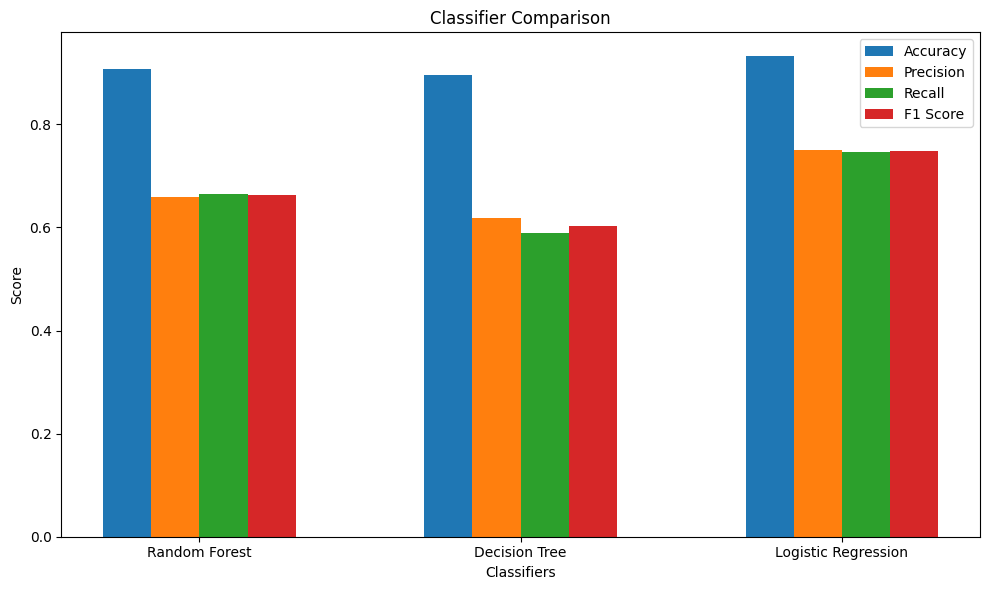

In [76]:
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(classifiers))


ax.bar(x, accuracy_scores, width=0.15, label='Accuracy')
ax.bar([i + 0.15 for i in x], precision_scores, width=0.15, label='Precision')
ax.bar([i + 0.3 for i in x], recall_scores, width=0.15, label='Recall')
ax.bar([i + 0.45 for i in x], f1_scores, width=0.15, label='F1 Score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Score')
ax.set_title('Classifier Comparison')
ax.set_xticks([i + 0.225 for i in x])
ax.set_xticklabels([classifier_name for classifier_name, _ in classifiers])
ax.legend()

plt.tight_layout()
plt.show()

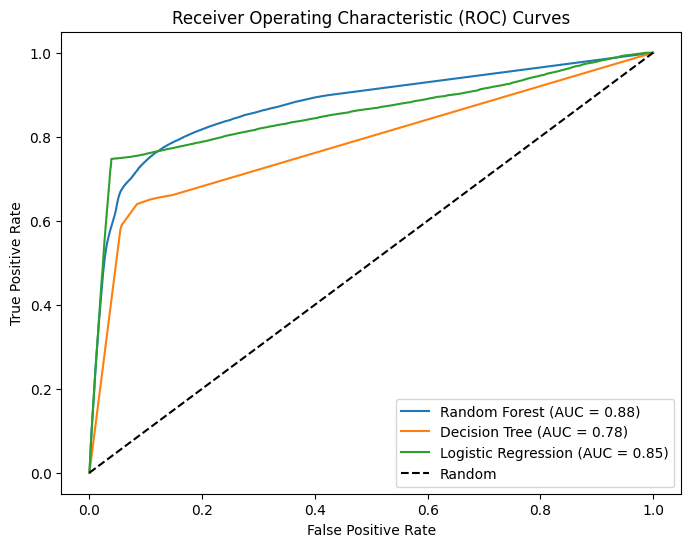

In [77]:
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

plt.figure(figsize=(8, 6))

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {auc:.2f})')

# Plot the random classifier ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [78]:
# Most 5 features importance with Sale Price

feature_importances.sort_values(by='importance', ascending=False).head(3).plot(x='feature', y='importance', cmap='coolwarm', kind='bar', figsize=(8, 4))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(' 3 Most Important Features for Sale Price')
plt.show()


importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances
sorted_importances = importance_series.sort_values(ascending=False)

# Get the top 5 most important features
top_3_features = sorted_importances.head(3)
print(top_3_features)

selected_features = top_3_features.index.tolist() + ['SalePrice']
correlation_matrix = combined_data[selected_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 3 Features and SalePrice')
plt.show()



ValueError: could not convert string to float: 'GNV'

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

NameError: name 'X' is not defined